# **Preprocessing**

### **Standardization**

**Removes** the **mean value** of the features and **scales** them using the **standard deviation**. The result is a set of new patterns with mean centered at the origin and standard deviation of 1.

Given a set of patterns $\textbf{x}=(x_1,\ldots,x_l)\in X$ the normalization consists of obtaining a new pattern $\textbf{z}=(z_1,\ldots,z_l)$ such that:

$$z_i = \frac{x_i-\bar{x_i}}{\sigma_i}$$

where $\bar{x_i}$ and $\sigma_i$ are the mean and standard deviation of feature $i$ of data $X$.

This transformation is suitable when features are suspected to follow a **normal distribution**. It is useful when **features have different scales and distributions**, as it helps to decrease the effect of features with a much larger variance than the others.

It is suitable for algorithms sensitive to feature scales, such as the Support Vector Machine.

However, it cannot guarantee that feature scales are balanced in the presence of outliers.

Its function in Sklearn is:

In [1]:
from sklearn.preprocessing import StandardScaler

Centering or scaling can be disabled using the parameters:

* with_mean = False
* with_std = False

### **MinMax Scaling**

It scales each feature in the data so that each one is in the **range [0,1]**.

It is very **sensitive** to the presence of **outliers**.

The transformation used is:

$$z_i = \frac{x_i-\min(x_i)}{\max(x_i)-min(x_i)}$$

It is an appropriate transformation when the **distribution of the features is unknown** (particularly when it is suspected that it is not a normal distribution) and there are **no outliers**.

Its function in Sklearn is:

In [2]:
from sklearn.preprocessing import MinMaxScaler

The range to which the data is mapped can be changed by changing the parameter to the desired range:

* feature_range

### **MaxAbs Scaling**

The data is scaled so that if there are positive and negative values the new range is **[-1,1]**. 

When there are only positive values, the new range is [0,1] and in the case of purely negative values [-1,0].

It is very **sensitive** to the presence of **outliers**.

It is an appropriate transformation when **many values are equal to 0** (scattered data)

The transformation used is:

$$z_i = \frac{x_i}{|\max(x_i)-\min(x_i)|}$$

Its function in Sklearn is:

In [3]:
from sklearn.preprocessing import MaxAbsScaler

### **Robust scaling**

Uses the **interquartile range** to scale the data.

It is a **more robust** preprocessing than MaxMin and MaxAbs, in the presence of **outliers**.

The transformation is:

$$ z_i = \frac{x_i-X_{i,50}}{X_{i,75}-X_{i,25}}$$

where $X_{i,j}$ means the $j$ percentile of feature $i$ of data $X$.

Its function in Sklearn is:

In [4]:
from sklearn.preprocessing import RobustScaler

### **Normalizer**

Each sample $x$ is **rescaled** so that **its norm is equal to 1**. This transformation is done for **each sample**, independently of the others.

The corresponding transformation is:

$$ z = \frac{x}{||x||}$$

Note that in this case $z$ and $x$ represent a vector.

This transformation is suitable to **make features comparable** to each other under the same norma. It can be useful when the learning model is affected by the **relative relationship** between features and not by their absolute values. Normalizing ensures that the **absolute magnitude of each feature does not influence the model**, but rather the proportional relationships between features.

Its function in Sklearn is:

In [5]:
from sklearn.preprocessing import Normalizer

The following norms can be defined
* $L_1$: 'l1'
* $L_2$: 'l2'
* $L_{\infty}$: 'max'

By defining the *norm* parameter.

# **Examples**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [7]:
df = load_wine()
data = pd.DataFrame(df["data"], columns=df["feature_names"])
X = np.stack([data["proline"], data["malic_acid"]], axis=1)
outlier = np.array([[2.065e+03, 10]])
X = np.vstack([X, outlier])

In [8]:
def plot_joint(X, title, ax):
  ax.scatter(x=X[:,0], y=X[:,1], color="darkblue")
  ax.set_title(title)
  if title not in ["Original data", "Normalizer"]:
      ax.set_aspect('equal')

In [9]:
standar = StandardScaler()
Z_standarscaler = standar.fit_transform(X)

In [10]:
minmax = MinMaxScaler()
Z_minmax = minmax.fit_transform(X)

In [11]:
robust = RobustScaler(quantile_range=(10.0, 90.0))
Z_robust = robust.fit_transform(X)

In [12]:
normalizer = Normalizer()
Z_normalizer = normalizer.fit_transform(X)

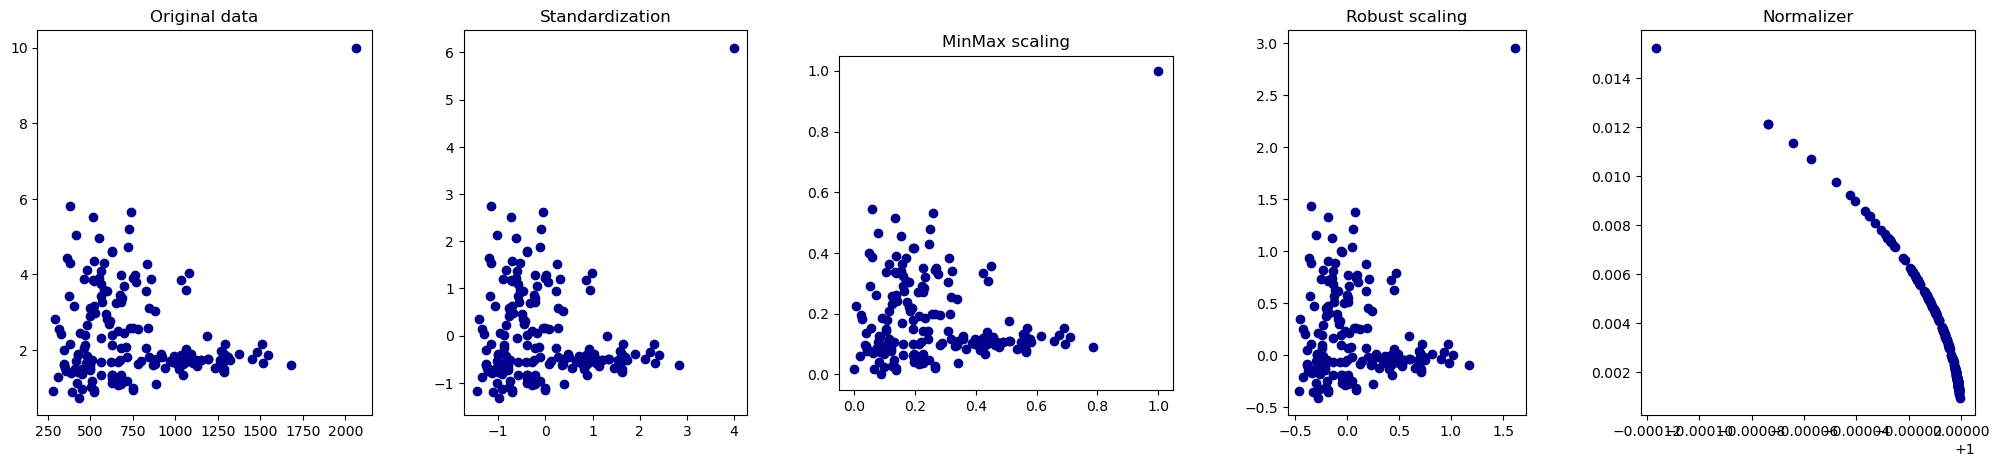

In [13]:
fig, ax = plt.subplots(1,5, figsize=(25, 5))
plot_joint(X, "Original data", ax[0])
plot_joint(Z_standarscaler, "Standardization", ax[1])
plot_joint(Z_minmax, "MinMax scaling", ax[2])
plot_joint(Z_robust, "Robust scaling", ax[3])
plot_joint(Z_normalizer, "Normalizer", ax[4])
plt.show()